In [70]:
import dtumathtools, pandas, scipy, statsmodels, uncertainties, math
import numpy as np
import matplotlib.pyplot as plt

#### 1.1 - Infant birth weight

##### a) - What is the sample mean, variance and standard deviation of the female birth?

Sample mean formula:

$$\bar{x} = \frac{1}{n} \sum^{n}_{i=1} x_i


In [ ]:
# Calculating manual the sample mean
female_birth_weight = np.array([2474, 2547, 2830, 3219, 3429, 3448, 3677, 3872, 4001, 4116]),
female_sum = female_birth_weight.sum()
female_mean = np.divide(female_sum, len(female_birth_weight))

print(f'Female Mean: {female_mean}')

#Control
print(f'Control Female Mean: {np.mean(female_birth_weight)}')

Female Mean: 3361.3
Control Female Mean: 3361.3


Sample variance formula:
$$s^2 = \frac{1}{n-1} \sum^{n}_{i=1} (x_i - \bar{x})^2

In [25]:
# Calculating manuel the variance formula
a = np.sum((female_birth_weight - female_mean)**2)
female_variance = np.divide(a, len(female_birth_weight) - 1)

print(f'Female Variance: {female_variance}')
print(f'Control Female Variance: {np.var(female_birth_weight, ddof=1)}')

Female Variance: 344920.4555555556
Control Female Variance: 344920.4555555556


Standard Deviation Formula:
$$ s = \sqrt{s^2} = \sqrt{\frac{1}{n-1} \sum^{n}_{i=1} (x_i - \bar{x})^2}

In [27]:
# Calculating manuel the standard deviation
female_standard_deviation = np.sqrt(female_variance)

print(f'Female Standard Deviation: {female_standard_deviation}')
print(f'Control Female Standard Devision: {np.std(female_birth_weight, ddof=1)}')

Female Standard Deviation: 587.2992895922449
Control Female Standard Devision: 587.2992895922449


- Express in your own words the story told by these numbers?

Answer:

We see that the average female birth weight is 3361.3 gram. The high variance at 344920 tell us that the data is spread. The standard deviation at 587.3 tells us that most babies weight fall within 587.3 plus and minus of the mean

$$ \pm 587.3

##### b) - Compute the same summary statistic of the male births. Compare and explain the differences with the results for the female birth

I will use the same formulas, so I wont be repeating them

In [ ]:
male_birth_weight = np.array([2844, 2863, 2963, 3239, 3379, 3449, 3582, 3926, 4151, 4356])

male_mean = np.mean(male_birth_weight)
male_variance = np.var(male_birth_weight, ddof=1)
male_standard_devision =  np.std(male_birth_weight, ddof=1)

# Male Values
print(f'Male Mean: {male_mean}')
print(f'Male Variance: {male_variance}')
print(f'Male Standard Deviation: {male_standard_devision}')

# Female Values
print(f'Female Mean: {female_mean}')
print(f'Female Variance: {female_variance}')
print(f'Female Standard Deviation: {female_standard_deviation}')

Male Mean: 3475.2
Male Variance: 283158.1777777777
Male Standard Devision: 532.1260919911537
Female Mean: 3361.3
Female Variance: 344920.4555555556
Female Standard Devision: 587.2992895922449


The male birth weights are on average a little higher than the female, while the standard deviation is a little smaller.

##### C) Find the five quartiles for each sample -- and draw the two box plots with pen and paper (Sorry!)

The five quartiles are $$Q_0 = minimum, Q_1 = 25\%, Q_2 = median, Q_3 = 75\%, Q_4 = maximum$$

Minimum and maximum can we find by looking at the first and last unit in the data. 

To calculate the Q_1 and Q_3 we can use the following formula:

*if pn is an integer*

$$q_p = (x_{np} + x_{np+1}) / 2$$

*if pn is a non-integer*

$$q_p = x_{\lceil np \rceil}$$

To find Q_2 we use the median formula:

*if n is odd the median*

$$Q_2 = x_{\frac{n+1}{2}}$$

*if n is even*

$$Q_2 = \frac{x_{\frac{n}{2}} + x_{\frac{n+2}{2}}}{2}$$

Female - Q_0: 2474, Q_1: 2830, Q_2: 3438.5, Q_3: 3872, Q_4: 4116
Male - Q_0: 2844, Q_1: 2963, Q_2: 3414.0, Q_3: 3926, Q_4: 4356


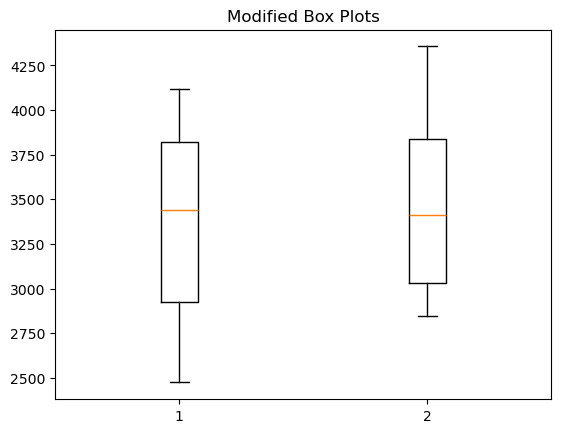

In [71]:
# Calculating Q_1, Q_2 and Q_3 (manuel with code)

female_n = len(female_birth_weight)
male_n = len(male_birth_weight)

# Finding Q_1 for female
female_pn = 0.25 * female_n #2.5 not a integer
female_pn = math.ceil(female_pn) # Ceil to 3

female_Q_1 = female_birth_weight[female_pn - 1]

# Finding Q_2 for female (n_female is even 10) REMEMBER THAT WE INDEX FROM 0. SO THE RESULTS SHOULD BE 5 and 6, BUT I NEED TO APPLY -1
female_Q_2 = np.divide(female_birth_weight[5 - 1] + female_birth_weight[6 - 1], 2)

# Finding Q_3 for female
female_pn = 0.75 * female_n # 7.5 not a integer
female_pn = math.ceil(female_pn) # Ceil to 8

Q_3_female = female_birth_weight[female_pn - 1]

print(f'Female - Q_0: {np.min(female_birth_weight)}, Q_1: {female_Q_1}, Q_2: {female_Q_2}, Q_3: {Q_3_female}, Q_4: {np.max(female_birth_weight)}')

# Finding Q_1 for males
male_pn = 0.25 * male_n #2.5 not a integer
male_pn = math.ceil(male_pn) # Ceil to 3

male_Q_1 = male_birth_weight[male_pn - 1]

# Finding Q_2 for male (n_male is 10. Thats a even number)
male_Q_2 = np.divide(male_birth_weight[5 - 1] + male_birth_weight[6 - 1], 2)

# Finding Q_3 for male
male_pn = 0.75 * male_n # 7.5 not a integer
male_pn = math.ceil(male_pn) # Cetil to 8

Q_3_male = male_birth_weight[male_pn - 1]

print(f'Male - Q_0: {np.min(male_birth_weight)}, Q_1: {male_Q_1}, Q_2: {male_Q_2}, Q_3: {Q_3_male}, Q_4: {np.max(male_birth_weight)}')

# Creating the two default box plots (modified boxplots are the default in plt)
plt.boxplot([female_birth_weight, male_birth_weight])
plt.title('Modified Box Plots')
plt.show()

##### d) Are there any "extreme" observations in the two samples (use the modified box plot definition of extremeness)?

No. Since we use the standard modified boxplot, we would see the extreme observation beyond the whiskers (minimum and maximum). In this case we see none.

##### e) What are the coefficient of variations in the two groups?

To find the coefficient of variation of the two groups, we use the following formula:

Coefficient of variation:
$$CV = \frac{s}{\bar{x}}$$

$$s\;(sample\;standard\;deviation)$$
$$\bar{x}\;(sample\;mean)$$


In [72]:
# Calculation Coefficient of Variation
female_CV = np.divide(female_standard_deviation, female_mean) * 100
male_CV = np.divide(male_standard_devision, male_mean) * 100

print(f'Female CV in %: {female_CV}')
print(f'Male CV ion %: {male_CV}')

Female CV in %: 17.472385374475497
Male CV ion %: 15.312099792563124


The smaller the coefficent variation the tighter the data is to the mean. In this case we get 17.47% for female and 15.31% for male. 

#### 1.2 - Course Grades

##### a) What is the median of the 251 achieved grades?



